In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import IsingHamiltonian, SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam, SGLBO

## PQC

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


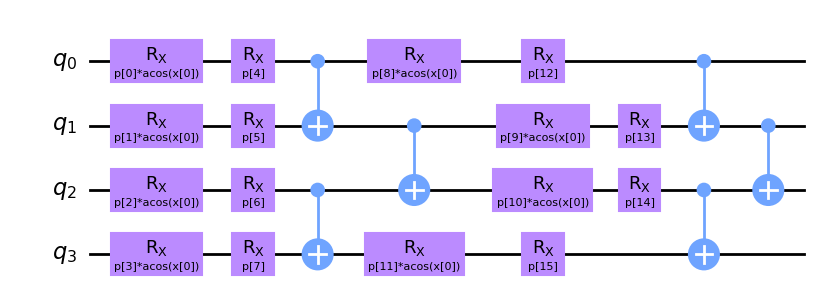

In [2]:
executor = Executor("qasm_simulator")
executor.set_shots(5000)

nqubits = 4
number_of_layers = 2

pqc = ChebyshevRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw("mpl")

## Observable

In [3]:
op = SummedPaulis(nqubits)
print(op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


In [4]:
# Randomly initialize parameters of the encoding circuit
np.random.seed(13)
param_ini =  np.random.rand(pqc.num_parameters)
# Initialize parameters of the observable as ones
param_op_ini = np.random.rand(op.num_parameters)
x0 = [[i * 0.02] for i in range(15)]

In [5]:


qnn_simulator_adam = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    Adam({"lr": 0.001,"log_file": "adam_logarithmus_noise_new.log", "maxiter": 300}),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(0.1, 0.9, 0.1)
y_train = np.log(x_train)

qnn_simulator_adam.fit(x_train, y_train)

fit: 100%|██████████| 300/300 [40:54<00:00,  8.16s/it]

In [6]:
#x0 = [[i * 0.02] for i in range(15)]
x0 = [[1e-6], [2e-6], [3e-6], [4e-6], [5e-6], [6e-6], [7e-6], [8e-6], [9e-6], [1e-5], [2e-5], [3e-5], [4e-5], [5e-5], [6e-5], [7e-5], [8e-5], [9e-5], [1e-4], [2e-4], [3e-4], [4e-4], [5e-4], [6e-4], [7e-4], [8e-4], [9e-4], [1e-3], [2e-3], [3e-3], [4e-3], [5e-3], [6e-3], [7e-3], [8e-3], [9e-3], [1e-2], [2e-2], [3e-2], [4e-2], [5e-2], [6e-2], [7e-2], [8e-2], [9e-2], [1e-1], [2e-1]]
optimizer_options = {"bo_aqc_func": "EI", "bo_aqc_optimizer": "lbfgs", "bo_bounds": [(0.0, 0.2)], "log_file": "sglbo_logarithmus_noise_new.log",
                     "bo_n_calls": 60, "bo_x0_points": x0, "maxiter": 300}

qnn_simulator_sglbo = QNNRegressor(
    pqc,
    op,
    executor,
    SquaredLoss(),
    SGLBO(optimizer_options),
    param_ini,
    param_op_ini=param_op_ini,
    opt_param_op=True, 
    parameter_seed=124
)

x_train = np.arange(0.1, 0.9, 0.1)
y_train = np.log(x_train)

qnn_simulator_sglbo.fit(x_train, y_train)


fit:   0%|          | 0/300 [00:00<?, ?it/s]BOP  fval:  18.369728851505254  x:  [1e-06]
BOP  fval:  18.329050048829284  x:  [2e-06]
BOP  fval:  18.285603386664366  x:  [3e-06]
BOP  fval:  18.195433504310525  x:  [4e-06]
BOP  fval:  18.32954336799841  x:  [5e-06]
BOP  fval:  18.046066254820698  x:  [6e-06]
BOP  fval:  18.31650617817524  x:  [7e-06]
BOP  fval:  17.911172519614908  x:  [8e-06]
BOP  fval:  18.344808746737197  x:  [9e-06]
BOP  fval:  18.31425409202662  x:  [1e-05]
BOP  fval:  18.026700244684278  x:  [2e-05]
BOP  fval:  18.21001162423756  x:  [3e-05]
BOP  fval:  18.203482533898445  x:  [4e-05]
BOP  fval:  18.15732447738415  x:  [5e-05]
BOP  fval:  17.85287800866167  x:  [6e-05]
BOP  fval:  18.261630664852902  x:  [7e-05]
BOP  fval:  17.945397721365385  x:  [8e-05]
BOP  fval:  18.196575526607546  x:  [9e-05]
BOP  fval:  18.270791748577814  x:  [0.0001]
BOP  fval:  18.11773012463983  x:  [0.0002]
BOP  fval:  18.029086645489564  x:  [0.0003]
BOP  fval:  18.037319132495803  x: 

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  1.7233009647881927  x:  [0.2]
BOP  fval:  1.7233009647881927  x:  [0.2]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  1.7233009647881927  x:  [0.2]
 Iteration:  2 :  gp_minimize:  fval:  1.7233009647881927  x:  [0.2]  bounds:  [(0.0, 0.2)] 
BOP  fval:  1.7545604047107528  x:  [1e-06]
BOP  fval:  1.7052519017052568  x:  [2e-06]
BOP  fval:  1.7066106073072222  x:  [3e-06]
BOP  fval:  1.70211428863538  x:  [4e-06]
BOP  fval:  1.6964744319593679  x:  [5e-06]
BOP  fval:  1.7808807595342024  x:  [6e-06]
BOP  fval:  1.7927604205531023  x:  [7e-06]
BOP  fval:  1.76604617227748  x:  [8e-06]
BOP  fval:  1.708886453695333  x:  [9e-06]
BOP  fval:  1.7013796759308866  x:  [1e-05]
BOP  fval:  1.7241777888607936  x:  [2e-05]
BOP  fval:  1.7998255200581075  x:  [3e-05]
BOP  fval:  1.6981789074111955  x:  [4e-05]
BOP  fval:  1.7491392051006178  x:  [5e-05]
BOP  fval:  1.7148681060676316  x:  [6e-05]
BOP  fval:  1.7016016328991888  x:  [7e-05]
BOP  fval:  1.7252503895212663  x:  [8e-05]
BOP  fval:  1.715114633443608  x:  [9e-05]
BOP  fval:  1.7136948043492577  x:  [0.0001]
BOP  fval:  1.6924904539635575  x:

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.8483608559051548  x:  [0.2]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.8483608559051548  x:  [0.2]
 Iteration:  4 :  gp_minimize:  fval:  0.8483608559051548  x:  [0.2]  bounds:  [(0.0, 0.2)] 
BOP  fval:  0.8269825058807999  x:  [1e-06]
BOP  fval:  0.8658281525823226  x:  [2e-06]
BOP  fval:  0.9248312658985772  x:  [3e-06]
BOP  fval:  0.9173825504943056  x:  [4e-06]
BOP  fval:  0.833318573804391  x:  [5e-06]
BOP  fval:  0.8803225149588128  x:  [6e-06]
BOP  fval:  0.8640134540987346  x:  [7e-06]
BOP  fval:  0.8821568701774246  x:  [8e-06]
BOP  fval:  0.8978408276126751  x:  [9e-06]
BOP  fval:  0.8950112010761839  x:  [1e-05]
BOP  fval:  0.8784906115016239  x:  [2e-05]
BOP  fval:  0.8761224099484564  x:  [3e-05]
BOP  fval:  0.9349911259625063  x:  [4e-05]
BOP  fval:  0.8632156918773645  x:  [5e-05]
BOP  fval:  0.9239093238346787  x:  [6e-05]
BOP  fval:  0.8605729147309519  x:  [7e-05]
BOP  fval:  0.8673021231677015  x:  [8e-05]
BOP  fval:  0.8488763548023085  x:  [9e-05]
BOP  fval:  0.8132104703932854  x:  [0.0001]
BOP  fval:  0.907092847371229

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.6564046340933772  x:  [0.2]
BOP  fval:  0.6564046340933772  x:  [0.2]
 Iteration:  5 :  gp_minimize:  fval:  0.6165144121857558  x:  [0.16885314971620352]  bounds:  [(0.0, 0.2)] 
BOP  fval:  0.7234388134563676  x:  [1e-06]
BOP  fval:  0.6837332534991207  x:  [2e-06]
BOP  fval:  0.6941400314848131  x:  [3e-06]
BOP  fval:  0.6942439924597479  x:  [4e-06]
BOP  fval:  0.6878032462287396  x:  [5e-06]
BOP  fval:  0.64694005568722  x:  [6e-06]
BOP  fval:  0.6543739922872654  x:  [7e-06]
BOP  fval:  0.6556586847338226  x:  [8e-06]
BOP  fval:  0.642844361769778  x:  [9e-06]
BOP  fval:  0.6499282264959323  x:  [1e-05]
BOP  fval:  0.6343093724577616  x:  [2e-05]
BOP  fval:  0.6531020772138143  x:  [3e-05]
BOP  fval:  0.656195848810164  x:  [4e-05]
BOP  fval:  0.669107663573974  x:  [5e-05]
BOP  fval:  0.7233389639913796  x:  [6e-05]
BOP  fval:  0.7222414811830469  x:  [7e-05]
BOP  fval:  0.7109362404765334  x:  [8e-05]
BOP  fval:  0.69972373927874  x:  [9e-05]
BOP  fval:  0.69073549

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.4379939456434649  x:  [0.2]
BOP  fval:  0.4379939456434649  x:  [0.2]
 Iteration:  10 :  gp_minimize:  fval:  0.4379939456434649  x:  [0.2]  bounds:  [(0.0, 0.2)] 
BOP  fval:  0.42770379358787414  x:  [1e-06]
BOP  fval:  0.4291557790580146  x:  [2e-06]
BOP  fval:  0.5260793521963091  x:  [3e-06]
BOP  fval:  0.4874732688819469  x:  [4e-06]
BOP  fval:  0.4367472434677135  x:  [5e-06]
BOP  fval:  0.4375398455754222  x:  [6e-06]
BOP  fval:  0.47785411917227527  x:  [7e-06]
BOP  fval:  0.41516610621168853  x:  [8e-06]
BOP  fval:  0.4709662828740344  x:  [9e-06]
BOP  fval:  0.4795525202595488  x:  [1e-05]
BOP  fval:  0.4793445238312629  x:  [2e-05]
BOP  fval:  0.4789239872989401  x:  [3e-05]
BOP  fval:  0.4957119014840235  x:  [4e-05]
BOP  fval:  0.5095099051278846  x:  [5e-05]
BOP  fval:  0.47496910480152416  x:  [6e-05]
BOP  fval:  0.46590629379070786  x:  [7e-05]
BOP  fval:  0.4574425954176566  x:  [8e-05]
BOP  fval:  0.45338824477940465  x:  [9e-05]
BOP  fval:  0.4466945473

C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.3831637972309526  x:  [0.2]


C:\Users\denni\PycharmProjects\squlearn\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BOP  fval:  0.3831637972309526  x:  [0.2]
 Iteration:  11 :  gp_minimize:  fval:  0.38233965924456625  x:  [0.07]  bounds:  [(0.0, 0.2)] 
BOP  fval:  0.3703743284758607  x:  [1e-06]
BOP  fval:  0.4240751137546423  x:  [2e-06]
BOP  fval:  0.45845062887947696  x:  [3e-06]
BOP  fval:  0.4580955183186776  x:  [4e-06]
BOP  fval:  0.4063921853527564  x:  [5e-06]
BOP  fval:  0.45670043271841354  x:  [6e-06]
BOP  fval:  0.46057350816251064  x:  [7e-06]
BOP  fval:  0.4212980632013388  x:  [8e-06]
BOP  fval:  0.4161174162091762  x:  [9e-06]
BOP  fval:  0.4477462773786578  x:  [1e-05]
BOP  fval:  0.45104003075420734  x:  [2e-05]
BOP  fval:  0.4419791602861033  x:  [3e-05]
BOP  fval:  0.47423633199875664  x:  [4e-05]
BOP  fval:  0.41166042955314436  x:  [5e-05]
BOP  fval:  0.39621913447216883  x:  [6e-05]
BOP  fval:  0.3853797695877028  x:  [7e-05]
BOP  fval:  0.4643058799554127  x:  [8e-05]
BOP  fval:  0.3834433238959245  x:  [9e-05]
BOP  fval:  0.4078068265003986  x:  [0.0001]
BOP  fval:  0.4404

## predict vs. actual function

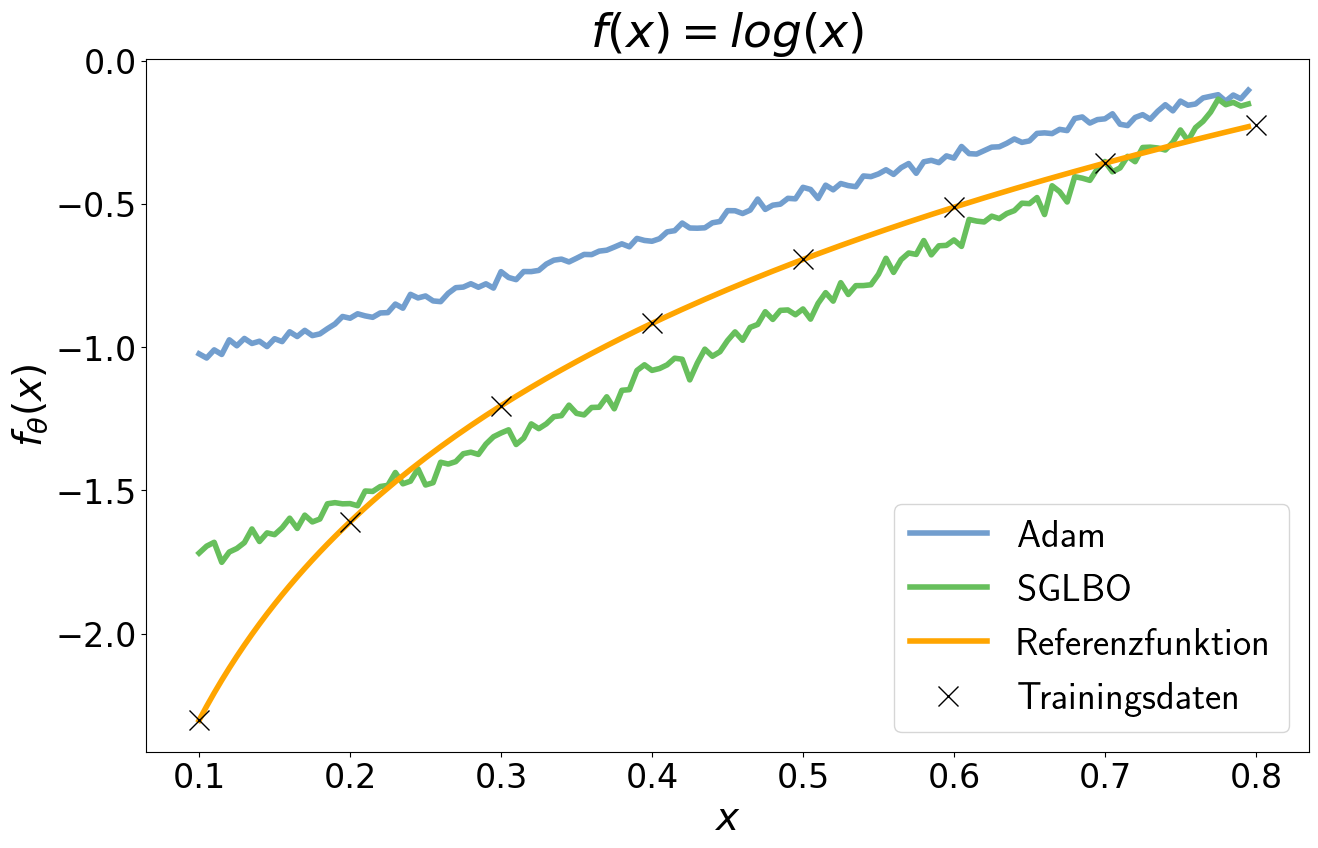

In [7]:
x = np.arange(np.min(x_train), np.max(x_train), 0.005)
y_adam = qnn_simulator_adam.predict(x)
y_sglbo = qnn_simulator_sglbo.predict(x)

plt.rc('text', usetex=False)
plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=4, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=4, color="#67BF5C")
plt.plot(x, np.log(x), label="Referenzfunktion", linewidth=4, color="orange")
plt.plot(x_train, np.log(x_train), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=14)

plt.rc('text', usetex=True)

plt.title(r'$f(x) = log(x)$', fontsize=34)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r'$x$', fontsize=28)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=28)
plt.legend(fontsize=28)

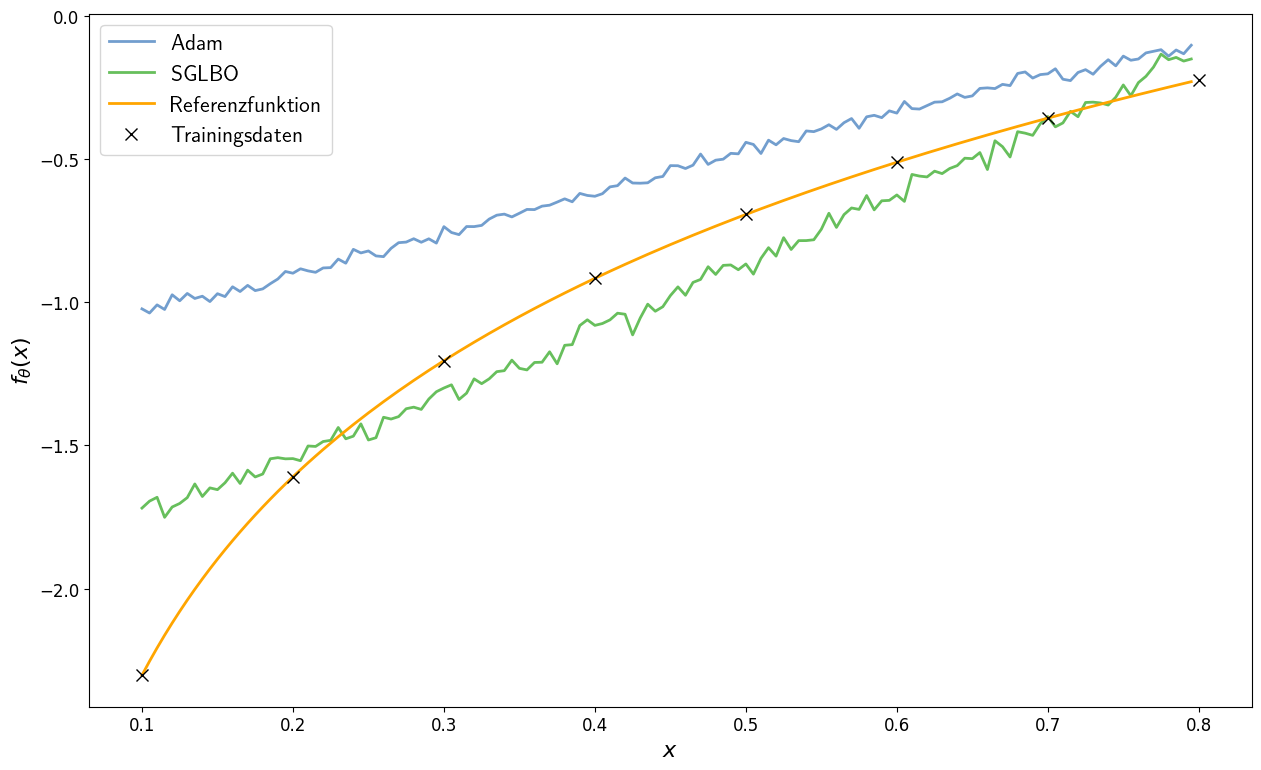

In [8]:

plt.rc('text', usetex=False)

plt.figure(figsize=(15, 9))
plt.plot(x, y_adam, label="Adam", linewidth=2, color="#729ECE")
plt.plot(x, y_sglbo, label="SGLBO", linewidth=2, color="#67BF5C")
plt.plot(x, np.log(x), label="Referenzfunktion", linewidth=2, color="orange")
plt.plot(x_train, np.log(x_train), marker="x", color="black", label="Trainingsdaten", linestyle=" ", markersize=8)

plt.rc('text', usetex=True)

#plt.title(r'$f(x) = log(x)$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$f_{\theta}(x)$', fontsize=16)
plt.legend(fontsize=16)